# <center>Statistical Models and Computing Methods, Problem Set 4
<center>王宇哲 2201112023
<center>Academy for Advanced Interdisciplinary Studies, Peking University

## Problem 1

Suppose the current density is $q(x)$. Let $q_T(x)$ be the density after one MCMC iteration with transition kernel $T(x|y)$. That is, 
$$
q_T (x)=\int q(y)T(x|y)dy\tag{1}
$$
Denote the equilibrium distribution of the Markov chain as $p(x)$ and assume that the transition kernel satisfies the detailed balance condition 
$$
p(x)T(y|x) = p(y)T(x|y)\tag{2}
$$
Show that
$$
{\rm KL}(q_T ||p) \leq {\rm KL}(q||p)\tag{3}
$$
When does the equality hold?

***Proof.*** From Jensen's inequality, we have
$$
\begin{aligned}
{\rm KL}(q_{T}||p)&=\mathbb{E}_{q_T}\log{\frac{q_T(x)}{p(x)}}\\
&=\int q_T(x)\log{\frac{q_T(x)}{p(x)}}dx\\
&=\iint q(y)T(x|y)\log{\frac{q_T(x)}{p(x)}}dxdy\\
&\leq\int q(y)dy\log{\Big(\int T(x|y)\frac{q_T(x)}{p(x)}dx\Big)}\\
&=\int q(y)dy\log{\Big(\int \frac{T(y|x)}{p(y)}q_T(x)}dx\Big)\\
&=\int q(y)dy\log\Big({\frac{q(y)}{p(y)}\int \frac{T(y|x)}{q(y)}q_T(x)}dx\Big)\\
&=\int q(y)\log{\frac{q(y)}{p(y)}}dy-\int q(y)\log\frac{q(y)}{\int T(y|x)q_T(x)dx}dy\\
&={\rm KL}(q||p)-\int q(y)\log\frac{q(y)}{\int T(y|x)q_T(x)dx}dy
\end{aligned}\tag{4}
$$
Denote $q'_{T}(y)=\int T(y|x)q_T(x)dx$, the latter term in $(4)$ becomes
$$
\int q(y)\log\frac{q(y)}{\int T(y|x)q_T(x)dx}dy=\int q(y)\log\frac{q(y)}{q'_T(y)}dy={\rm KL}(q||q'_T)\geq0\tag{5}
$$
Hence
$$
{\rm KL}(q_T||p)\leq{\rm KL}(q||p)-{\rm KL}(q||q'_T)\leq{\rm KL}(q||p)\tag{6}
$$
The equality holds when the transition kernel $T(x|y)={\rm const.}$

## Problem 2

Consider the following multi-sample lower bounds for variational inference
$$
\mathcal{L}_K(q)=\mathbb{E}_{\theta_1,\ldots,\theta_K\sim q(\theta)}\log{\Big(\frac{1}{K}\sum_{i=1}^{K}\frac{p(x,\theta_i)}{q(\theta_i)}\Big)}\tag{7}
$$
Show that
$$
\mathcal{L}_K(q)\leq\mathcal{L}_{K+1}(q)\leq\log{p(x)},\ \ \forall K\geq 1\tag{8}
$$

***Proof.*** From Jensen's inequality, we have
$$
\begin{aligned}
\mathcal{L}_K(q)&=\mathbb{E}_{\theta_1,\ldots,\theta_K\sim q(\theta)}\log{\Big(\frac{1}{K}\sum_{i=1}^{K}\frac{p(x,\theta_i)}{q(\theta_i)}\Big)}\\
&\leq\log\Big(\mathbb{E}_{\theta_1,\ldots,\theta_K\sim q(\theta)}\frac{1}{K}\sum_{i=1}^{K}\frac{p(x,\theta_i)}{q(\theta_i)}\Big)\\
&=\log\Big(\frac{1}{K}\sum_{i=1}^{K}\int q(\theta_i) \frac{p(x,\theta_i)}{q(\theta_i)}d\theta_i\Big)\\
&=\log p(x)
\end{aligned}\tag{9}
$$
Let $I\subset {1,\ldots,k}$ with $|I|=m\leq k$ be a uniformly distributed subset of distinct indices from $\{1,\ldots,k\}$, we have the following observation
$$
\mathbb{E}_{I=\{i_1,\ldots,i_m\}}\frac{a_{i1}+\ldots+a_{i_m}}{m}=\frac{a_1+\ldots+a_k}{k}\tag{10}
$$
for any $\{a_1, \ldots,a_k\}$, in which $\mathbb{E}_{I=\{i_1,\ldots,i_m\}}$ denotes an expectation for all possible formation of subset $I$. From Jensen's inequality, we have
$$
\begin{aligned}
\mathcal{L}_k(q)&=\mathbb{E}_{\theta_1,\ldots,\theta_k\sim q(\theta)}\log{\Big(\frac{1}{k}\sum_{i=1}^{k}\frac{p(x,\theta_i)}{q(\theta_i)}\Big)}\\
&=\mathbb{E}_{\theta_1,\ldots,\theta_k\sim q(\theta)}\log\Big({\mathbb{E}_{I=\{i_1,\ldots,i_m\}}\frac{1}{m}\sum_{i=1}^{m}\frac{p(x,\theta_i)}{q(\theta_i)}\Big)}\\
&\geq \mathbb{E}_{\theta_1,\ldots,\theta_k\sim q(\theta)}\mathbb{E}_{I=\{i_1,\ldots,i_m\}}\log{\Big(\frac{1}{m}\sum_{i=1}^{m}\frac{p(x,\theta_i)}{q(\theta_i)}\Big)}\\
&=\mathbb{E}_{\theta_1,\ldots,\theta_m\sim q(\theta)}\log{\Big(\frac{1}{m}\sum_{i=1}^{m}\frac{p(x,\theta_i)}{q(\theta_i)}\Big)}\\
&=\mathcal{L}_{m}(q)
\end{aligned}\tag{11}
$$
Let $k=K+1,\, m=K$, we have
$$
\mathcal{L}_{K}(q)\leq\mathcal{L}_{K+1}(q)\tag{12}
$$
We combine $(3)$ and $(6)$ to obtain $(2)$.   $\square$

You can use Pytorch or Tensorflow for the following problems. However, you are not allowed to use any libraries that provide some sort of "pre-cooked" implementation of the corresponding models. You need to implement them and the training algorithms from the basic building blocks yourself. For the optimization, we recommend you use one of the popular algorithms such as Adam.

## Problem 3

Consider the following banana-shaped distribution with normal priors
$$
y_i\sim\mathcal{N}(\theta_1+\theta_2^2,\sigma^2_y),\ \ i=1,\ldots,n,\ \ \theta\sim\mathcal{N}(0,\sigma^2_\theta I)\tag{13}
$$
where $\sigma_\theta=1,\sigma_y=2$. Download the data from the course website.

(1) Derive the ELBO and gradient estimator (using the reparameterization trick) for a general normalizing flow model with a standard normal base distribution.

***Proof.*** Consider a general normalizing flow model with a standard normal base distribution
$$
q_0(\boldsymbol{\theta}_0)=\frac{1}{2\pi}\exp{\Big(-\frac{\boldsymbol{\theta}_0^T\boldsymbol{\theta}_0}{2}\Big)}\tag{14}
$$
in which $\boldsymbol{\theta}=(\theta_1,\theta_2)^T$. Suppose the normalizing flow model is composed of $K$ invertible transformations
$$
\boldsymbol{\theta}_k=f_k(\boldsymbol{\theta}_{k-1})\tag{15}
$$
we have
$$
\log{q_K(\boldsymbol{\theta}_K)}=\log{q_0(\boldsymbol{\theta}_0)}-\sum_{k=1}^{K}\log{\Big|\det\Big(\frac{\partial f_k(\boldsymbol{\theta}_{k-1})}{\partial \boldsymbol{\theta}_{k-1}}\Big)\Big|}\tag{16}
$$
We denote the parameters of $K$ invertible transformations by $\phi$. The evidence lower bound (ELBO) is
$$
\begin{aligned}
\mathcal{L}(\phi)&=\mathbb{E}_{q_K(\boldsymbol{\theta}_K)}\log{\frac{p(\boldsymbol{y},\boldsymbol{\theta}_K)}{q_K(\boldsymbol{\theta}_K)}}\\
&=\mathbb{E}_{q_0(\boldsymbol{\theta}_0)}\log p(\boldsymbol{y},\boldsymbol{\theta}_K)-\mathbb{E}_{q_0(\boldsymbol{\theta}_0)}\log q_0(\boldsymbol{\theta}_0)+\sum_{k=1}^K \mathbb{E}_{q_0(\boldsymbol{\theta}_0)}\log{\Big|\det\Big(\frac{\partial f_k(\boldsymbol{\theta}_{k-1})}{\partial \boldsymbol{\theta}_{k-1}}\Big)\Big|}\\
\end{aligned}\tag{17}
$$
The gradient of ELBO is
$$
\begin{aligned}
\nabla_{\phi}\mathcal{L}(\phi)&=\nabla_{\phi}\mathbb{E}_{q_K(\boldsymbol{\theta}_K)}\log{\frac{p(\boldsymbol{y},\boldsymbol{\theta}_K)}{q_K(\boldsymbol{\theta}_K)}}\\
&=\nabla_{\phi}\mathbb{E}_{q_0(\boldsymbol{\theta}_0)}\big(\log p(\boldsymbol{y},\boldsymbol{\theta}_K)-\log q_K(\boldsymbol{\theta}_K)\big)\\
&=\mathbb{E}_{q_0(\boldsymbol{\theta}_0)}\nabla_{\phi}\big(\log p(\boldsymbol{y},\boldsymbol{\theta}_K)-\log q_K(\boldsymbol{\theta}_K)\big)\\
&=\mathbb{E}_{q_0(\boldsymbol{\theta}_0)}\nabla_{\phi}\Big(\log p(\boldsymbol{y},\boldsymbol{\theta}_K)-\log q_0(\boldsymbol{\theta}_0)+\sum_{k=1}^K \log{\Big|\det\Big(\frac{\partial f_k(\boldsymbol{\theta}_{k-1})}{\partial \boldsymbol{\theta}_{k-1}}\Big)\Big|}\Big)\\
\end{aligned}\tag{18}
$$
using the reparameterization trick. We can further derive the Monte Carlo gradient estimator
$$
\nabla_{\phi}\hat{\mathcal{L}}(\phi)=\frac{1}{S}\sum_{s=1}^{S}\nabla_{\phi}\Big(\log p(\boldsymbol{y},\boldsymbol{\theta}^{(s)}_K)-\log q_0(\boldsymbol{\theta}_0^{(s)})+\sum_{k=1}^K \log{\Big|\det\Big(\frac{\partial f_k(\boldsymbol{\theta}^{(s)}_{k-1})}{\partial \boldsymbol{\theta}^{(s)}_{k-1}}\Big)\Big|}\Big),\ \ \boldsymbol{\theta}^{(s)}_0\sim q_0(\boldsymbol{\theta}_0)\tag{19}
$$

(2) Implement the following normalizing flows: planar flows, NICE and RealNVP. Use your favorite stochastic gradient ascent method for training. Show the lower bound as a function of the number of iterations.

***Proof.*** For **planar flows**, the invertible transformation $f_{\phi}$ is defined as
$$
f_{\phi,\,{\rm planar}}(\boldsymbol{\theta})=\boldsymbol{\theta}+\boldsymbol{u}h(\boldsymbol{w}^T\boldsymbol{\theta}+b)\tag{20}
$$
parameterized by $\phi=(\boldsymbol{w},\boldsymbol{u},b)$, in which 
$$
h(\cdot)=\tanh{(\cdot)},\ \ \boldsymbol{u}^T\boldsymbol{w}\geq -1\tag{21}
$$
to achieve this constraint, we arbitrarily take a vector $\boldsymbol{u}$ and modify it by
$$
\hat{\boldsymbol{u}}=\boldsymbol{u}+\Big(\log{\big(1+\exp{(\boldsymbol{w}^T\boldsymbol{u})}\big)-1-\boldsymbol{w}^T\boldsymbol{u}}\Big)\frac{\boldsymbol{w}}{||\boldsymbol{w}||^2}\tag{22}
$$
The determinant of the Jacobian satisfies
$$
\begin{aligned}
\Big|\det \frac{\partial f_{\phi,\,{\rm planar}}(\boldsymbol{\theta})}{\partial\boldsymbol{\theta}}\Big|&=\Big|\det\big(\boldsymbol{I}+h'(\boldsymbol{w}^T\boldsymbol{\theta}+b)\boldsymbol{u}\boldsymbol{w}^T\big)\Big|\\
&=\Big|1+h'(\boldsymbol{w}^T\boldsymbol{\theta}+b)\boldsymbol{u}^T\boldsymbol{w}\Big|
\end{aligned}\tag{23}
$$
For **NICE**, the invertible transformation $f_{\phi}$ (forward mapping) consists of several additive coupling layers (we use two layers in practice, considering the structure of $\boldsymbol{\theta}$)
$$
\theta'_1=\theta_1,\ \ \theta'_2=\theta_2+m_{\phi_1}(\theta_1)\tag{24}
$$
and
$$
\theta''_2=\theta'_2,\ \ \theta''_1=\theta'_1+m_{\phi_2}(\theta'_2)\tag{25}
$$
where $m_{\phi}:\mathbb{R}\rightarrow\mathbb{R}$ are multi-layer perceptrons (MLPs), and a rescaling layer
$$
\theta'''_1=s_1\theta''_1,\ \ \theta'''_2=s_2\theta''_2\tag{26}
$$
where the scaling factor $s_i>0$. The determinant of the Jacobian satisfies 
$$
\Big|\det \frac{\partial f_{\phi,\,{\rm NICE}}(\boldsymbol{\theta})}{\partial\boldsymbol{\theta}}\Big|=|s_1s_2|\tag{27}
$$
For **RealNVP**, the invertible transformation $f_{\phi}$ (forward mapping) consists of
$$
\theta'_1=\theta_1,\ \ \theta'_2=\theta_2\exp(m_{\phi_1}(\theta_1))+\exp(m_{\phi_2}(\theta_1))\tag{28}
$$
and
$$
\theta''_2=\theta'_2,\ \ \theta''_1=\theta'_1\exp(m_{\phi_3}(\theta'_2))+\exp(m_{\phi_4}(\theta'_2))\tag{29}
$$
where $m_{\phi}:\mathbb{R}\rightarrow\mathbb{R}$ are multi-layer perceptrons (MLPs). The determinant of the Jacobian satisfies 
$$
\Big|\det \frac{\partial f_{\phi,\,{\rm RealNVP}}(\boldsymbol{\theta})}{\partial\boldsymbol{\theta}}\Big|=\exp\Big(m_{\phi_1}(\theta_1)+m_{\phi_3}(\theta'_2)\Big)\tag{30}
$$
Pytorch implementation of planar flows, NICE and RealNVP is as follows. MLPs are initialized with $2$ hidden layers with $32$ units each. For the loss function, we directly use the negative Monte Carlo ELBO estimator
$$
\begin{aligned}
-\hat{\mathcal{L}}(\phi)
&=-\frac{1}{S}\sum_{s=1}^{S}\Big(\log p(\boldsymbol{y},\boldsymbol{\theta}_K^{(s)})-\log q_0(\boldsymbol{\theta}^{(s)}_0)+\sum_{k=1}^K  \log{\Big|\det\Big(\frac{\partial f_k(\boldsymbol{\theta}^{(s)}_{k-1})}{\partial \boldsymbol{\theta}^{(s)}_{k-1}}\Big)\Big|}\Big),\ \ \boldsymbol{\theta}^{(s)}_0\sim q_0(\boldsymbol{\theta}_0)\\
\end{aligned}\tag{31}
$$
in which we set $S=100$ and 
$$
\begin{aligned}
\log p(\boldsymbol{y},\boldsymbol{\theta}_K^{(s)})&=\log{p(\boldsymbol{y}|\boldsymbol{\theta}_K^{(s)})}+\log{p(\boldsymbol{\theta}_K^{(s)})}\\
&=\sum_{i=1}^{N}\log{p(y_i|\boldsymbol{\theta}}_K^{(s)})+\log{p(\boldsymbol{\theta}_K^{(s)})}
\end{aligned}\tag{32}
$$
The former term $\log{p(y_i|\boldsymbol{\theta}}_K^{(s)})$ is given by $y_i\sim\mathcal{N}(\theta_1+\theta_2^2,\sigma^2_y)$, and the latter term is given by the prior $\theta\sim\mathcal{N}(0,\sigma^2_\theta I)$. For the optimizer, we use Adam with ${\rm lr}=1e-3$, ${\rm weight\,decay}=1e-5$.

In [57]:
import os
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch import nn

from tqdm import tqdm
%matplotlib inline

data = np.load('banana_shape_data.npy')


class MultiLayerPerceptron(nn.Module):
    """
    Multi-layer Perceptron
    """
    def __init__(self, n_hidden_layers=2, input_dim=1, hidden_dim=32, output_dim=1):
        super(MultiLayerPerceptron, self).__init__()
        self.layers = nn.ModuleList()

        self.layers.append(nn.Linear(input_dim, hidden_dim))
        self.layers.append(nn.ReLU())
        for i in range(n_hidden_layers-1):
            self.layers.append(nn.Linear(hidden_dim, hidden_dim))
            self.layers.append(nn.ReLU())
        self.layers.append(nn.Linear(hidden_dim, output_dim))

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return x
        
        
class PlanarFlow(nn.Module):
    """
    Implementation of Planar Flows
    """
    def __init__(self, shape=2):
        super(PlanarFlow, self).__init__()
        self.w = nn.Parameter(torch.randn(shape)[None])
        self.u = nn.Parameter(torch.randn(shape)[None])
        self.b = nn.Parameter(torch.randn(1))
        
    
    def forward(self, z):
        uTw = torch.sum(self.w * self.u)
        u_hat = self.u + (torch.log(1 + torch.exp(uTw)) - 1 - uTw) * self.w / torch.sum(self.w**2)
        
        wTz = torch.sum(self.w * z, list(range(1, self.w.dim())), keepdim=True)
        # https://medium.com/analytics-vidhya/an-intuitive-understanding-on-tensor-sum-dimension-with-pytorch-d9b0b6ebbae

        log_det = torch.log(torch.abs(1 + torch.sum(u_hat * self.w) / (torch.cosh(wTz + self.b).reshape(-1))**2))
        z = z + u_hat * torch.tanh(wTz + self.b)

        return z, log_det
    

class NICE(nn.Module):
    """
    Implementation of NICE (Nonlinear Independent Components Estimation)
    """
    def __init__(self, shape=2):
        super(NICE, self).__init__()
        self.s = nn.Parameter(torch.randn(shape)[None])
        self.mlp1, self.mlp2 = [MultiLayerPerceptron(n_hidden_layers=2, input_dim=shape//2, hidden_dim=32, output_dim=shape//2) for i in range(2)]
            
    def forward(self, z):
        z1, z2 = z.chunk(2, dim=1)
        z2 = z2 + self.mlp1(z1)
        z1 = z1 + self.mlp2(z2)
        z = torch.cat([z1, z2], dim=1)
        z = z * torch.abs(self.s)

        log_det = torch.sum(torch.log(torch.abs(self.s)))
        
        return z, log_det


class RealNVP(nn.Module):
    """
    Implementation of RealNVP (Real-valued Non-Volume Preserving)
    """
    def __init__(self, shape=2):
        super(RealNVP, self).__init__()
        self.mlp1, self.mlp2, self.mlp3, self.mlp4 = [MultiLayerPerceptron(n_hidden_layers=2, input_dim=shape//2, hidden_dim=32, output_dim=shape//2) for i in range(4)]

    def forward(self, z):
        z1, z2 = z.chunk(2, dim=1)
        log_det_term1 = self.mlp1(z1)
        z2 = z2 * torch.exp(log_det_term1) + self.mlp2(z1)
        log_det_term2 = self.mlp3(z2)
        z1 = z1 * torch.exp(log_det_term2) + self.mlp4(z2)
        z = torch.cat([z1, z2], dim=1)

        log_det = (log_det_term1 + log_det_term2).reshape(-1)

        return z, log_det


class NormalizingFlow(nn.Module):
    """
    Normalizing Flow model
    """
    def __init__(
        self,
        model_type,
        train_data=data,
        shape=2,
        n_flow=4,
        sample_size=100
    ):
        super(NormalizingFlow, self).__init__()
        self.train_data = train_data
        self.shape = shape
        self.sample_size = sample_size
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

        if model_type == 'Planar':
            self.flows = nn.ModuleList([PlanarFlow(shape) for i in range(n_flow)])
        elif model_type == 'NICE':
            self.flows = nn.ModuleList([NICE(shape) for i in range(n_flow)])
        elif model_type == 'RealNVP':
            self.flows = nn.ModuleList([RealNVP(shape) for i in range(n_flow)])
        else:
            raise NotImplementedError('This type of normalizing flow model is yet to be implemented.')


    def compute_ELBO(self):
        """
        compute ELBO estimated via Monte Carlo
        """
        sample = torch.tensor(np.random.normal(size=(self.sample_size, self.shape)), dtype=torch.float32, device=self.device)
        sample_init = sample.detach().clone()
        train_data = torch.tensor(self.train_data, dtype=torch.float32, device=self.device)

        log_det_sum = torch.zeros(self.sample_size, dtype=torch.float32, device=self.device)
        for flow in self.flows:
            sample, log_det = flow(sample)
            log_det_sum += log_det

        sample_theta1, sample_theta2 = sample.chunk(2, dim=1)

        ELBO_term1 = torch.sum(torch.log(torch.exp(-0.125 * (sample_theta1 + sample_theta2**2 - train_data)**2) / (2*np.sqrt(2*torch.pi))), dim=1)
        ELBO_term2 = -0.5 * torch.sum(sample**2, dim=1) - np.log(2*np.pi)
        ELBO_term3 = 0.5 * torch.sum(sample_init**2, dim=1) + np.log(2*np.pi)
        ELBO_term4 = log_det_sum

        computed_ELBO = torch.mean(ELBO_term1 + ELBO_term2 + ELBO_term3 + ELBO_term4)

        return computed_ELBO


    def draw_sample(self, n_sample=500):
        """
        draw samples of amount `n_sample` from the model
        """
        sample = torch.tensor(np.random.normal(size=(n_sample, self.shape)), dtype=torch.float32, device=self.device)
        for flow in self.flows:
            sample, _ = flow(sample)

        return sample.detach().clone().to('cpu').numpy()


    def save(self, path):
        """
        save state dict of the model
        """
        torch.save(self.state_dict(), path)


    def load(self, path):
        """
        load model from state dict
        """
        self.load_state_dict(torch.load(path))


For **planar flows**, we set the number of flows $K=8$, train the model for $10000$ epochs and save the trained model as `Planar_model`. We show the ELBO as a function of the number of iterations (left) and visualize $500$ randomly drawn samples from the trained model (right).

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [04:01<00:00, 41.49it/s]


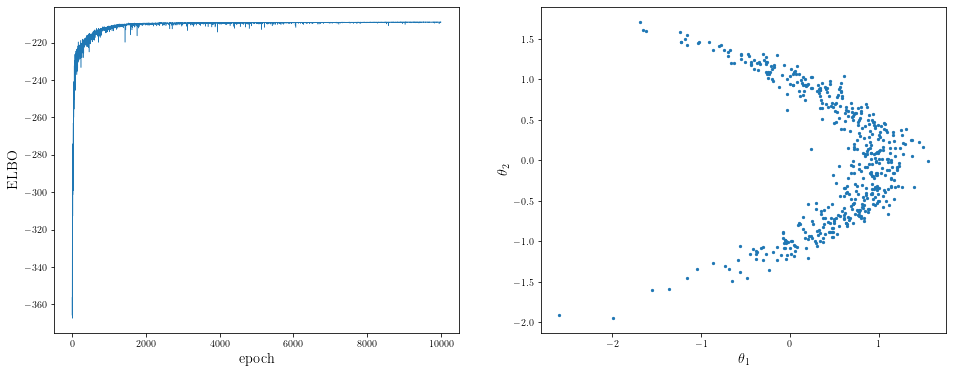

In [39]:
# Planar Flows 
model = NormalizingFlow(model_type='Planar', n_flow=8)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

num_iter = 10000
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)
loss_list = []

for iter in tqdm(range(num_iter)):
    optimizer.zero_grad()
    loss = -model.compute_ELBO()
    if not (torch.isnan(loss) or torch.isinf(loss)):
        loss.backward()
        optimizer.step()
        loss_list.append(loss.detach().clone().to('cpu').numpy())
    else:
        loss_list.append(loss_list[-1])

model.save('Planar_model')
learned_sample = model.draw_sample(n_sample=500)

fig, (ax1, ax2) = plt.subplots(1,2)
plt.rcParams.update({
    "text.usetex": True
})
ax1.plot(np.arange(1, num_iter+1, dtype=int), np.array(loss_list)*(-1), linewidth=1)
ax1.set_xlabel('$\\rm epoch$', fontsize='x-large')
ax1.set_ylabel('$\\rm ELBO$', fontsize='x-large')

ax2.scatter(learned_sample[:,0], learned_sample[:,1], s=5)
ax2.set_xlabel('$\\theta_1$', fontsize='x-large')
ax2.set_ylabel('$\\theta_2$', fontsize='x-large')

fig.set_size_inches(16,6)
plt.savefig('4-3-2-1.jpg',dpi=1000, bbox_inches='tight')
plt.show()

For **NICE**, we set the number of flows $K=4$, train the model for $10000$ epochs and save the trained model as `NICE_model`. We show the ELBO as a function of the number of iterations (left) and visualize $500$ randomly drawn samples from the trained model (right).

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [03:19<00:00, 50.19it/s]


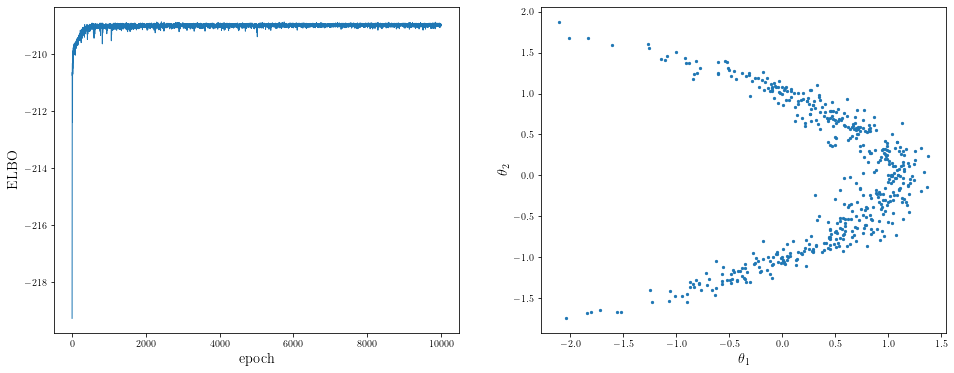

In [3]:
# NICE
model = NormalizingFlow(model_type='NICE', n_flow=4)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

num_iter = 10000
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)
loss_list = []

for iter in tqdm(range(num_iter)):
    optimizer.zero_grad()
    loss = -model.compute_ELBO()
    if not (torch.isnan(loss) or torch.isinf(loss)):
        loss.backward()
        optimizer.step()
        loss_list.append(loss.detach().clone().to('cpu').numpy())
    else:
        loss_list.append(loss_list[-1])

model.save('NICE_model')
learned_sample = model.draw_sample(n_sample=500)

fig, (ax1, ax2) = plt.subplots(1,2)
plt.rcParams.update({
    "text.usetex": True
})
ax1.plot(np.arange(1, num_iter+1, dtype=int), np.array(loss_list)*(-1), linewidth=1)
ax1.set_xlabel('$\\rm epoch$', fontsize='x-large')
ax1.set_ylabel('$\\rm ELBO$', fontsize='x-large')

ax2.scatter(learned_sample[:,0], learned_sample[:,1], s=5)
ax2.set_xlabel('$\\theta_1$', fontsize='x-large')
ax2.set_ylabel('$\\theta_2$', fontsize='x-large')

fig.set_size_inches(16,6)
plt.savefig('4-3-2-2.jpg',dpi=1000, bbox_inches='tight')
plt.show()

For **RealNVP**, we set the number of flows $K=4$, train the model for $10000$ epochs and save the trained model as `RealNVP_model`. We show the ELBO as a function of the number of iterations (left) and visualize $500$ randomly drawn samples from the trained model (right).

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [05:32<00:00, 30.10it/s]


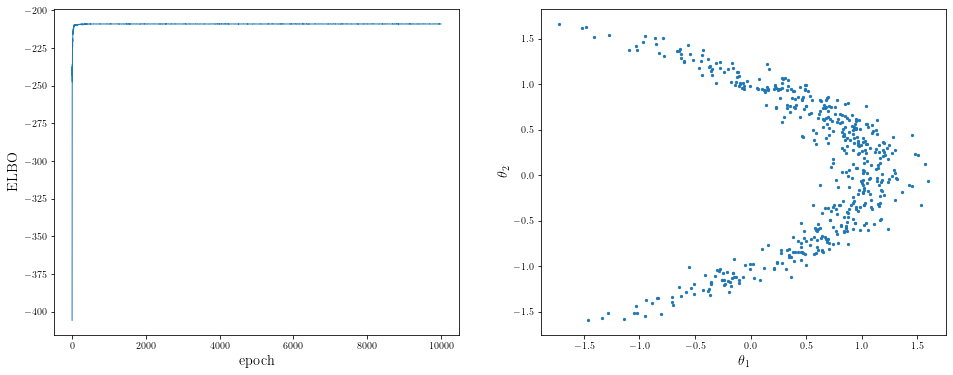

In [58]:
# RealNVP
model = NormalizingFlow(model_type='RealNVP', n_flow=4)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

num_iter = 10000
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)
loss_list = []

for iter in tqdm(range(num_iter)):
    optimizer.zero_grad()
    loss = -model.compute_ELBO()
    if not (torch.isnan(loss) or torch.isinf(loss)):
        loss.backward()
        optimizer.step()
        loss_list.append(loss.detach().clone().to('cpu').numpy())
    else:
        loss_list.append(loss_list[-1])

model.save('RealNVP_model')
learned_sample = model.draw_sample(n_sample=500)

fig, (ax1, ax2) = plt.subplots(1,2)
plt.rcParams.update({
    "text.usetex": True
})
ax1.plot(np.arange(1, num_iter+1, dtype=int), np.array(loss_list)*(-1), linewidth=1)
ax1.set_xlabel('$\\rm epoch$', fontsize='x-large')
ax1.set_ylabel('$\\rm ELBO$', fontsize='x-large')

ax2.scatter(learned_sample[:,0], learned_sample[:,1], s=5)
ax2.set_xlabel('$\\theta_1$', fontsize='x-large')
ax2.set_ylabel('$\\theta_2$', fontsize='x-large')

fig.set_size_inches(16,6)
plt.savefig('4-3-2-3.jpg',dpi=1000, bbox_inches='tight')
plt.show()

(3) Implement a Hamiltonian Monte Carlo sampler to collect 500 samples (with the first 500 samples discarded as burn-in).

***Proof.*** Consider the observed data $\boldsymbol{y}=(y_1,\ldots,y_n)^T$, the log likelihood $L(\boldsymbol{\theta})$ of the banana-shaped distribution is given by
$$
\begin{aligned}
L(\boldsymbol{\theta})=\log{p(\boldsymbol{y}|\boldsymbol{\theta})}&=\sum_{i=1}^{N}\log{p(y_i|\boldsymbol{\theta})}\\
&=-\frac{1}{8}\sum_{i=1}^{N}(y_i-\theta_1-\theta_2^2)^2
\end{aligned}\tag{33}
$$
up to a constant. Given the prior $\boldsymbol{\theta}\sim\mathcal{N}(0,\boldsymbol{I})$, we calculate
$$
\log{p(\boldsymbol{\theta})}=-\frac{\boldsymbol{\theta}^T\boldsymbol{\theta}}{2}=-\frac{1}{2}(\theta_1^2+\theta_2^2)\tag{34}
$$
up to a constant. Hence the log posterior is given by
$$
\log{p(\boldsymbol{\theta}|\boldsymbol{y})}=L(\boldsymbol{\theta})+\log{p(\boldsymbol{\theta})}=-\frac{1}{8}\sum_{i=1}^{N}(y_i-\theta_1-\theta_2^2)^2-\frac{1}{2}(\theta_1^2+\theta_2^2)\tag{35}
$$
We introduce momentum $\boldsymbol{r}\sim\mathcal{N}(0,\boldsymbol{I})$ which carries Euclidean-Gaussian kinetic energy
$$
K(\boldsymbol{r})=\frac{\boldsymbol{r}^T\boldsymbol{r}}{2}=\frac{1}{2}(r_1^2+r_2^2)\tag{36}
$$
and potential energy
$$
U(\boldsymbol{\theta})=-\log{p(\boldsymbol{\theta}|\boldsymbol{y})}=\frac{1}{8}\sum_{i=1}^{N}(y_i-\theta_1-\theta_2^2)^2+\frac{1}{2}(\theta_1^2+\theta_2^2)\tag{37}
$$
to define Hamiltonian
$$
H(\boldsymbol{\theta},\boldsymbol{r})=U(\boldsymbol{\theta})+K(\boldsymbol{r})=\frac{1}{8}\sum_{i=1}^{N}(y_i-\theta_1-\theta_2^2)^2+\frac{1}{2}(\theta_1^2+\theta_2^2)+\frac{1}{2}(r_1^2+r_2^2)\tag{38}
$$
To run leap-frog algorithm, we also calculate
$$
\nabla_{\boldsymbol{\theta}}U(\boldsymbol{\theta})=\Big(-\frac{1}{4}\sum_{i=1}^{N}\big(y_i-\theta_1-\theta_2^2\big)+\theta_1,-\frac{\theta_2}{2}\sum_{i=1}^{N}\big(y_i-\theta_1-\theta_2^2\big)+\theta_2\Big)^T\tag{39}
$$
and 
$$
\nabla_{\boldsymbol{r}}K(\boldsymbol{r})=\boldsymbol{r}={(r_1,r_2)}^T\tag{40}
$$
Let $L$ be the number of leap-frog steps, the Hamiltonian Monte Carlo algorithm (in one iteration) is described as follows:

1. sample momentum $\boldsymbol{r}\sim\mathcal{N}(0,\boldsymbol{I})$
2. run leap-frog integrator for $L$ steps 
3. accept new position with probability

$$
a=\min\Big(1,\exp{\big(-H(\boldsymbol{\beta}',\boldsymbol{r}')+H(\boldsymbol{\beta},\boldsymbol{r})\big)}\Big)\tag{41}
$$

Python implementation of the Hamiltonian Monte Carlo sampler is as follows. $L$, $L_{\rm max}$ and step-size $\varepsilon$ are tuned empirically. $\boldsymbol{\beta}$ is initialized at $(0,0)^{T}$.

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 230.13it/s]


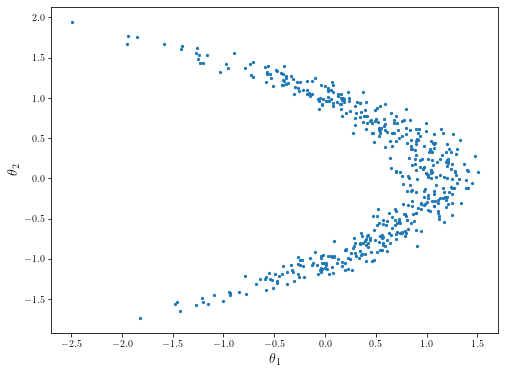

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline

data = np.load('banana_shape_data.npy')
y = data.reshape(len(data),1)


def U(theta, y=y):
    """
    calculate the potential energy U(theta)
    """
    theta_1, theta_2 = theta[0], theta[1]
    U = 0.125 * np.sum(np.square(y - theta_1 - theta_2**2)) + 0.5 * (theta_1**2 + theta_2**2)

    return U


def K(r):
    """
    calculate the kinetic energy K(r)
    """
    K = 0.5 * np.dot(r.T, r)

    return K


def nabla_U(theta, y=y):
    """
    calculate the gradient of the potential energy U(theta)
    """
    theta_1, theta_2 = theta[0], theta[1]
    n_sum = np.sum(y - theta_1 - theta_2**2)
    nabla_U_1 = -0.25 * n_sum + theta_1
    nabla_U_2 = -0.5 * theta_2 * n_sum + theta_2
    nabla_U = np.array([nabla_U_1, nabla_U_2]).reshape(2,1)

    return nabla_U


def nabla_K(r):
    """
    calculate the gradient of the kinetic energy K(r)
    """
    return r


def H(theta, r, y=y):
    """
    calculate the Hamiltonian
    """
    return U(theta, y=y) + K(r)


def accept_p(beta_new, r_new, beta_init, r_init, y=y):
    """
    calculate the acceptance probability
    """
    a = min(1, np.exp(-H(beta_new, r_new, y=y) + H(beta_init, r_init, y=y)))

    return a


def leap_frog(beta, r, epsilon, y=y):
    """
    perform one step of leap-frog algorithm
    """
    r_m = r - 0.5 * epsilon * nabla_U(beta, y=y)
    beta_new = beta + epsilon * nabla_K(r_m)
    r_new = r_m - 0.5 * epsilon * nabla_U(beta_new, y=y)

    return beta_new, r_new


def HMC(L, sample_num, burn_in_num, epsilon, beta_0=np.zeros((2,1)), rand_steps=False, y=y):
    """
    implement Hamiltonian Monte Carlo algorithm\n
    if rand_steps is set to False (default), use a fixed L=L; otherwise use a random L ~ Uniform(1,L)
    """
    beta = beta_0
    beta_list = beta.copy()
    sample_collected = 0

    with tqdm(total = sample_num + burn_in_num) as pbar:
        while sample_collected < sample_num + burn_in_num:
            beta_init = beta.copy()
            r = np.random.multivariate_normal(mean=np.array([0,0]), cov=np.eye(2)).reshape(2,1)
            r_init = r.copy()

            if rand_steps == False:
                L = L
            elif rand_steps == True:
                L = np.random.randint(low=1, high=L+1)

            for step in range(L):
                beta, r = leap_frog(beta, r, epsilon=epsilon, y=y)

            u = np.random.rand()
            if u < accept_p(beta_new=beta, r_new=r, beta_init=beta_init, r_init=r_init, y=y):
                sample_collected += 1
                pbar.update(1)
                if sample_collected > burn_in_num:
                    beta_list = np.concatenate((beta_list, beta.copy()), axis=1)
            else:
                beta = beta_init.copy()
                r = r_init.copy()

    return beta_list


# initialize and run the HMC sampler
theta_list = HMC(L=100, sample_num=500, burn_in_num=500, epsilon=0.05, rand_steps=False)


# plot scatter
fig, ax = plt.subplots()
plt.rcParams.update({
    "text.usetex": True
})
ax.scatter(theta_list[0][1:], theta_list[1][1:], s=5)

fig.set_size_inches(8,6)
plt.xlabel('$\\theta_1$', fontsize='x-large')
plt.ylabel('$\\theta_2$', fontsize='x-large')
plt.savefig('4-3-3.jpg',dpi=1000, bbox_inches='tight')
plt.show()

(4) Draw 500 samples from each of the trained normalizing flow models. Show the scatter plots of these samples and compare to your HMC results. You may also try out a larger sample size (e.g., 10000) and report the KL divergence to the ground truth from a long HMC run (say, 10000 samples with 10000 discarded as burn-in).

***Proof.*** We have drawn $500$ samples from each of the trained normalizing flow models, show the scatter plots of these samples and compare to HMC results in $(2)\sim(3)$. In $(4)$, we first draw $10000$ samples (with $10000$ discarded as burn-in) from a long HMC run as the ground truth and save as `banana_ground_truth.npy`.

In [56]:
theta_list = HMC(L=100, sample_num=10000, burn_in_num=10000, epsilon=0.05, rand_steps=False)
np.save('banana_ground_truth.npy', theta_list)

100%|███████████████████████████████████████████████████████████████████████████| 20000/20000 [01:29<00:00, 224.20it/s]


We then draw $10000$ samples from each of the trained normalizing flow models and compute the KL divergence using the ITE package (https://bitbucket.org/szzoli/ite-in-python/src/master/). Samples from each of the models as well as the ground truth are visualized below. Computed values of KL divergence are annotated in the titles, respectively.

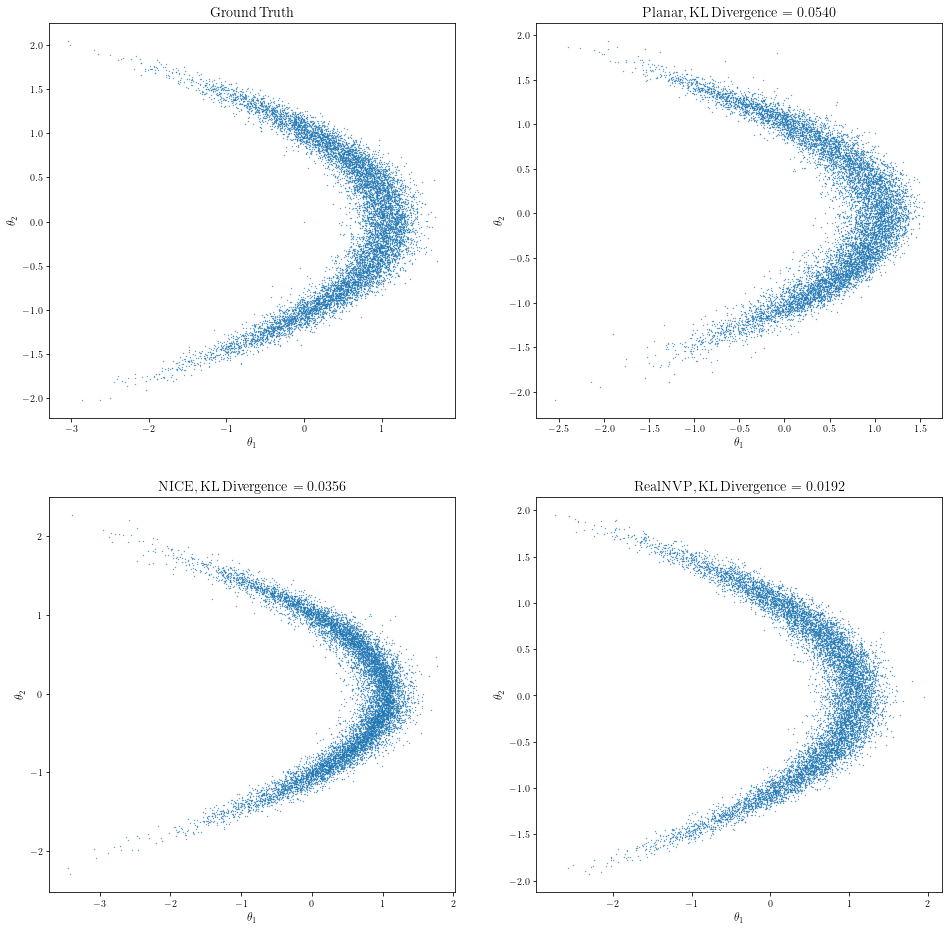

In [62]:
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch import nn

from tqdm import tqdm
import ite
%matplotlib inline


def KL_div(data, ground_truth):
    """
    calculate KL divergence between the given data distribution and the ground-truth distribution
    """
    co = ite.cost.BDKL_KnnK()
    d = co.estimation(data.T, ground_truth.T)
    
    return d


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)
plt.rcParams.update({
    "text.usetex": True
})

banana_ground_truth = np.load('banana_ground_truth.npy')

ax1.scatter(banana_ground_truth[0], banana_ground_truth[1], s=0.1)
ax1.set_xlabel('$\\theta_1$', fontsize='large')
ax1.set_ylabel('$\\theta_2$', fontsize='large')
ax1.set_title('$\\rm Ground\, Truth$', fontsize='x-large')


for model_type, n_flow, ax in zip(['Planar', 'NICE', 'RealNVP'], [8, 4, 4], [ax2, ax3, ax4]):
    model = NormalizingFlow(model_type=model_type, n_flow=n_flow)
    model.load(f'{model_type}_model')

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)

    learned_sample = model.draw_sample(n_sample=10000)

    computed_KL_div = KL_div(learned_sample.T, banana_ground_truth)

    ax.scatter(learned_sample[:,0], learned_sample[:,1], s=0.1)
    ax.set_xlabel('$\\theta_1$', fontsize='large')
    ax.set_ylabel('$\\theta_2$', fontsize='large')
    ax.set_title(f'$\\rm {model_type}, KL\, Divergence={computed_KL_div:.4f}$', fontsize='x-large')

    
fig.set_size_inches(16,16)
plt.savefig('4-3-4.jpg',dpi=1000, bbox_inches='tight')
plt.show()

We can see from above that all three normalizing flow models, namely Planar Flows, NICE and RealNVP generate samples that well resemble the ground truth. RealNVP outperforms the other models and enjoys the lowest KL divergence ($D_{\rm KL}=0.0192$). 

## Problem 4

In this problem, we ask you to rederive and implement Variational Autoencoder (VAE) on the MNIST dataset. More specifically, our goal is to learn a directed latent variable model that can represent a complex distribution over data in the following form
$$
p_{\theta}(x) =\int p_{\theta}(x|z)p(z)dz\tag{42}
$$
In this problem, we assume a Gaussian prior on $z$ and consider $x$ to be binary vectors.

(1) Assume that we would like to approximate the posterior distribution $p_{\theta}(z|x)$ using some variational distribution, $q_{\phi}(z|x)$. Derive the evidence lower bound (ELBO) on the log likelihood of the model for $N$ data points, $\{x^{(i)}\}^{N}_{i=1}$.

***Proof.*** For an arbitrary data point $x$, the log likelihood (from Jensen's inequality)
$$
\begin{aligned}
\log{p_{\theta}(x)}&=\log{\Big(\mathbb{E}_{z\sim q_{\phi}(z)}\frac{p_{\theta}(x,z)}{q_{\phi}(z)}\Big)}\\
&\geq\mathbb{E}_{z\sim q_{\phi}(z)}\log\frac{p_{\theta}(x,z)}{q_{\phi}(z)}\\
&=\mathbb{E}_{z\sim q_{\phi}(z)}\log{p_{\theta}(x,z)}-\mathbb{E}_{z\sim q_{\phi}(z)}\log{q_{\phi}(z)}\\
&=\mathbb{E}_{z\sim q_{\phi}(z)}\log{p_{\theta}(x,z)}-H(q_{\phi})\\
&=\mathcal{L}(x;\theta,\phi)
\end{aligned}\tag{43}
$$
For the entire dataset with $N$ data points $\{x^{(i)}\}^{N}_{i=1}$, we have the evidence lower bound (ELBO)
$$
\mathcal{L}=\sum_{i=1}^{N}\mathcal{L}(x^{(i)};\theta,\phi^{(i)})=\sum_{i=1}^{N}\mathbb{E}_{z^{(i)}\sim q_{\phi^{(i)}}(z^{(i)})}\big(\log{p_{\theta}(x^{(i)},z^{(i)})}-\log{q_{\phi^{(i)}}(z^{(i)})}\big)\tag{44}
$$

(2) VAE optimizes the ELBO w.r.t. the parameters of the generative model and parameters of the variational distribution (inference model). Write down the stochastic estimate of the ELBO derived above. Derive the gradient of the ELBO using the reparameterization trick. Briefly describe the advantages and disadvantages of VAE.

***Proof.*** For each of the data point $x^{(i)}$, we randomly draw $M$ samples from $q_{\phi^{(i)}}(z)$ *i.e.* $z_j\sim q_{\phi^{(i)}}(z_j)$. The ELBO derived above is stochastically estimated by
$$
\hat{\mathcal{L}}=\frac{1}{M}\sum_{i=1}^{N}\sum_{j=1}^{M}\big(\log{p_{\theta}(x^{(i)},z^{(i)}_j)}-\log{q_{\phi^{(i)}}(z_j^{(i)})}\big)\tag{45}
$$
 The gradient of ELBO respect to $\theta$ is estimated by
$$
\nabla_{\theta}\hat{\mathcal{L}}=\frac{1}{M}\sum_{i=1}^{N}\sum_{j=1}^{M}\nabla_{\theta}\log{p_{\theta}(x^{(i)},z_{j}^{(i)})}\tag{46}
$$
The gradient of ELBO respect to $\phi$ requires the following reparameterization trick to exist
$$
\exists \,g_{\phi},\, q_\epsilon, \,{\rm s.t.}\ \ z=g_{\phi}(\epsilon),\,\epsilon\sim q_{\epsilon}\Rightarrow z\sim q_{\phi}(z)\tag{47}
$$
hence
$$
\begin{aligned}
\nabla_{\phi^{(i)}}\mathcal{L}&=\nabla_{\phi^{(i)}}\sum_{i=1}^{N}\mathbb{E}_{z^{(i)}\sim q_{\phi^{(i)}}(z^{(i)})}\big(\log{p_{\theta}(x^{(i)},z^{(i)})}-\log{q_{\phi^{(i)}}(z^{(i)})}\big)\\
&=\nabla_{\phi^{(i)}}\mathbb{E}_{z^{(i)}\sim q_{\phi^{(i)}}(z^{(i)})}\big(\log{p_{\theta}(x^{(i)},z^{(i)})}-\log{q_{\phi^{(i)}}(z^{(i)})}\big)\\
&=\nabla_{\phi^{(i)}}\mathbb{E}_{{\epsilon}^{(i)}\sim q_{{\epsilon}^{(i)}}({\epsilon}^{(i)})}\big(\log{p_{\theta}(x^{(i)},g_{\phi^{(i)}}({\epsilon}^{(i)}))}-\log{q_{\phi^{(i)}}(g_{\phi^{(i)}}(\epsilon^{(i)}))}\big)\\
&=\mathbb{E}_{{\epsilon}^{(i)}\sim q_{{\epsilon}^{(i)}}({\epsilon}^{(i)})}\nabla_{\phi^{(i)}}\big(\log{p_{\theta}(x^{(i)},g_{\phi^{(i)}}({\epsilon}^{(i)}))}-\log{q_{\phi^{(i)}}(g_{\phi^{(i)}}(\epsilon^{(i)}))}\big)\\
\end{aligned}\tag{48}
$$
hence the gradient of ELBO respect to $\phi^{(i)}$ is estimated by
$$
\nabla_{\phi^{(i)}}\hat{\mathcal{L}}=\frac{1}{M}\sum_{j=1}^{M}\big(\nabla_{\phi^{(i)}}\log{p_{\theta}(x^{(i)},g_{\phi^{(i)}}({\epsilon}^{(i)}_j))}-\nabla_{\phi^{(i)}}\log{q_{\phi^{(i)}}(g_{\phi^{(i)}}(\epsilon^{(i)}_j))}\big)\tag{49}
$$
in which $\epsilon^{(i)}_j\sim q_{\epsilon^{(i)}}(\epsilon^{(i)}),\ \ j=1,\ldots,M$. In practice, we learn a function $f_{\lambda}$ parameterized by $\lambda$ that maps $x^{(i)}\mapsto \phi^{(i,*)}$. We denote $q(z;f_{\lambda}(x^{(i)}))$ by $q_{\phi}(z|x^{(i)})$ as well, which is known as Amortized Inference.

VAEs are capable of learning features in an unsupervised way and generating new data samples that are similar to the training data, which can be useful for tasks such as image or text generation. However, VAEs can be sensitive to the choice of hyperparameters, such as the size of the latent space and the learning rate. VAEs can struggle to learn the underlying structure of the data if the latent space is not large enough. VAEs can be difficult to train, especially when the data is complex or has a high-dimensional structure.

(3) Use neural networks with one hidden layer that consists of 512 ReLU neurons for both generative and inference networks. Let the dimensionality of the latent space be 2. Set the output layer of the generative network for $p_{\theta}(x|z)$ to be sigmoid neurons for binary representation of $x$. Implement and train this VAE model for about 100 epochs. Provide the plots of the $\mathcal{L}^{\rm train}_{1000}$ and $\mathcal{L}^{\rm test}_{1000}$ vs. the epoch number.

***Proof.*** The VAE model on the MNIST dataset is illustrated below.

<img src="VAE.png" alt="VAE" style="zoom:25%;" />

We assume a Gaussian prior on $z$ and consider $x$ to be binary vectors. Following [[Kingma & Welling, 2013]](https://arxiv.org/pdf/1312.6114.pdf), we consider the ELBO
$$
\begin{aligned}
\mathcal{L}(x;\theta,\phi)&=\mathbb{E}_{q_{\phi}(z|x)}\big(\log{p_{\theta}(x,z)}-\log{q_{\phi}(z|x)}\big)\\
&=\mathbb{E}_{q_{\phi}(z|x)}\big(\log{p_{\theta}(x|z)}+\log{p_{\theta}(z)}-\log{q_{\phi}(z|x)}\big)\\
&=\mathbb{E}_{q_{\phi}(z|x)}\log{p_{\theta}(x|z;\theta)}-D_{\rm KL}(q_{\phi}(z|x)||p_{\theta}(z))
\end{aligned}\tag{50}
$$
The Gaussian prior on $z$ gives
$$
p_{\theta}(z)=\mathcal{N}(0,\boldsymbol{I})\tag{51}
$$
from the reparameterization trick, we have
$$
q_{\phi}(z|x)=\mathcal{N}(z;\mu_{\phi},\sigma^2_{\phi})\tag{52}
$$
in which $\mu_{\phi}$ and $\sigma^2_{\phi}$ are parameterized by MLPs. Hence the KL divergence term can be computed analytically
$$
\begin{aligned}
-D_{\rm KL}(q_{\phi}(z|x)||p_{\theta}(z))&=-\int q_{\phi}(z|x)\log{\frac{q_{\phi}(z|x)}{p_{\theta}(z)}}dz\\
&=\int q_{\phi}(z|x)\log{p_{\theta}(z)}dz-\int q_{\phi}(z|x)\log{q_{\phi}(z|x)}dz\\
&=\int\mathcal{N}(z;\mu_{\phi},\sigma^2_{\phi})\mathcal{N}(z;0,\boldsymbol{I})dz-\int\mathcal{N}(z;\mu_{\phi},\sigma^2_{\phi})\log\mathcal{N}(z;\mu_{\phi},\sigma^2_{\phi})dz\\
&=\frac{1}{2}\sum_{k=1}^{K}\big(1+\log{({\sigma^{(k)}_{\phi}})^2}-(\mu^{(k)}_{\phi})^2-(\sigma^{(k)}_{\phi})^2\big)
\end{aligned}\tag{53}
$$
in which $\sigma^{(k)}_{\phi}$ and $\mu^{(k)}_{\phi}$ denotes the $k\text{-}{\rm th}$ element of the vectors. On the other hand, consider the Bernoulli MLP as decoder, we have
$$
\log{p_{\theta}(x|z)}=\sum_{i=1}^{D}x_i\log{y_i}+(1-x_i)\log(1-y_i)\tag{54}
$$
in which $D$ is the dimension of the input data, and $y_i$ is the output of the decoder. This term has the form of the (negative) Binary Cross Entropy (BCE). Hence we intuitively rewrite the ELBO as
$$
\mathcal{L}(x;\theta,\phi)=-{\rm BCE}(x,\hat{x})-D_{\rm KL}(q_{\phi}(z|x)||p_{\theta}(z))\tag{55}
$$
and the loss function is set to be $-\sum_{i=1}^{N}\mathcal{L}(x^{(i)};\theta,\phi^{(i)})$. Pytorch implementation of VAE is as follows. We train the VAE model for $100$ epochs with $\rm batch\, size=1000$. For the optimizer, we use Adam with ${\rm lr}=1e-3$, ${\rm weight\,decay}=1e-5$. We provide the plots of the $\mathcal{L}^{\rm train}_{1000}$ and $\mathcal{L}^{\rm test}_{1000}$ vs. the epoch number below.

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [11:15<00:00,  6.76s/it]


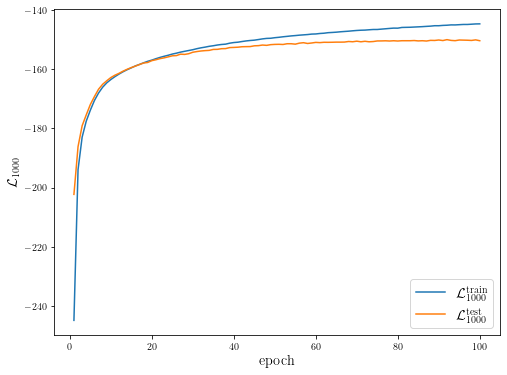

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch import nn
import torchvision

from tqdm import tqdm
%matplotlib inline


class MultiLayerPerceptron(nn.Module):
    """
    Multi-layer Perceptron
    """
    def __init__(self, input_dim=28*28, output_dim=28*28, n_hidden_layers=1, hidden_dim=512, binary_output=False):
        super(MultiLayerPerceptron, self).__init__()
        self.layers = nn.ModuleList()

        self.layers.append(nn.Linear(input_dim, hidden_dim))
        self.layers.append(nn.ReLU())

        for i in range(n_hidden_layers-1):
            self.layers.append(nn.Linear(hidden_dim, hidden_dim))
            self.layers.append(nn.ReLU())

        self.layers.append(nn.Linear(hidden_dim, output_dim))
        if binary_output:
            self.layers.append(nn.Sigmoid())

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return x
        
        
class VariationalAutoEncoder(nn.Module):
    """
    Variational Auto-Encoder
    """
    def __init__(self, input_dim, output_dim, latent_dim=2, n_hidden_layers=1, hidden_dim=512):
        super(VariationalAutoEncoder, self).__init__()
        self.latent_dim = latent_dim

        self.encoder = MultiLayerPerceptron(input_dim, 2*latent_dim, n_hidden_layers, hidden_dim)
        self.decoder = MultiLayerPerceptron(latent_dim, output_dim, n_hidden_layers, hidden_dim, binary_output=True)


    def forward(self, x):
        z = self.encoder(x)
        mu, log_sigma = z[:,:self.latent_dim], z[:,self.latent_dim:]

        z = self.reparameterize(mu, log_sigma)
        x_recon = self.decoder(z)

        return x_recon, mu, log_sigma


    def reparameterize(self, mu, log_sigma):
        """
        reparameterization trick \n
        z = \mu + \epsilon * \sigma
        """
        epsilon = torch.randn_like(log_sigma)
        z = mu + epsilon * torch.exp(log_sigma)

        return z


    def loss_function(self, x, x_recon, mu, log_sigma):
        """
        loss function
        https://ai.stackexchange.com/questions/24564/how-does-the-implementation-of-the-vaes-objective-function-equate-to-elbo
        """
        recon_loss = nn.BCELoss(reduction='sum')(x_recon, x)
        kl_div = -0.5 * torch.sum(1 + 2*log_sigma - mu**2 - torch.exp(2*log_sigma))

        return recon_loss + kl_div


    def sample(self, n_samples):
        """
        randomly sample from the latent space
        """
        z = torch.randn(n_samples, self.latent_dim)
        x_recon = self.decoder(z)

        return x_recon


    def to_latent(self, x):
        """
        convert data to latent space
        """
        z = self.encoder(x)
        mu = z[:,:self.latent_dim]

        return mu


    def generate_from_latent(self, z):
        """
        generate data from latent space
        """
        x_recon = self.decoder(z)

        return x_recon


    def save(self, path):
        """
        save state dict of the model
        """
        torch.save(self.state_dict(), path)


    def load(self, path):
        """
        load model from state dict
        """
        self.load_state_dict(torch.load(path))


def train(model, train_data, test_data, device, n_epochs=100, lr=1e-3, weight_decay=1e-5, save_path=os.getcwd()):
    """
    train VAE model
    """
    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

    train_loss_list = []
    test_loss_list = []

    for epoch in tqdm(range(n_epochs)):
        train_loss = 0
        for x, _ in train_data:
            x = x.view(-1, 28*28).to(device)

            x_recon, mu, log_sigma = model(x)
            loss = model.loss_function(x, x_recon, mu, log_sigma)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            #https://pytorch.org/docs/stable/generated/torch.Tensor.item.html

        train_loss /= len(train_data.dataset)
        train_loss_list.append(train_loss)

        test_loss = 0
        for x, _ in test_data:
            x = x.view(-1, 28*28).to(device)

            x_recon, mu, log_sigma = model(x)
            loss = model.loss_function(x, x_recon, mu, log_sigma)

            test_loss += loss.item()

        test_loss /= len(test_data.dataset)
        test_loss_list.append(test_loss)

    if save_path is not None:
        model.save(save_path)

    return train_loss_list, test_loss_list


MNIST_train_data = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('MNIST_train_data', train=True, download=True, transform=torchvision.transforms.ToTensor()),
    batch_size=1000, shuffle=True
)
MNIST_test_data = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('MNIST_test_data', train=False, download=True, transform=torchvision.transforms.ToTensor()),
    batch_size=1000, shuffle=True
)

VAE_model = VariationalAutoEncoder(28*28, 28*28, latent_dim=2, n_hidden_layers=1, hidden_dim=512)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
VAE_model.to(device)

train_loss_list, test_loss_list = train(VAE_model, MNIST_train_data, MNIST_test_data, device='cuda', n_epochs=100, lr=1e-3, weight_decay=1e-5, save_path='VAE_model')

fig, ax = plt.subplots()
plt.rcParams.update({
    "text.usetex": True
})
ax.plot(np.arange(1, len(train_loss_list)+1, dtype=int), np.array(train_loss_list)*(-1), label='$\\mathcal{L}^{\\rm train}_{1000}$')
ax.plot(np.arange(1, len(test_loss_list)+1, dtype=int), np.array(test_loss_list)*(-1), label='$\\mathcal{L}^{\\rm test}_{1000}$')
ax.set_xlabel('$\\rm epoch$', fontsize='x-large')
ax.set_ylabel('$\\mathcal{L}_{1000}$', fontsize='x-large')


fig.set_size_inches(8,6)
plt.legend(fontsize='x-large')
plt.savefig('4-4-3.jpg',dpi=1000, bbox_inches='tight')
plt.show()

(4) Visualize a random sample of 100 MNIST digits on $10\times  10$ tile grid. Sample and visualize 100 "fake" digits from your trained model in the same manner.

***Proof.*** We visualize a random sample of $100$ MNIST digits on a $10\times 10$ grid below.

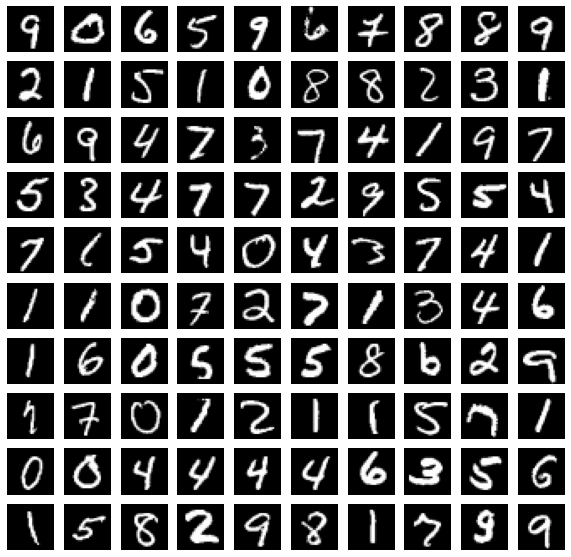

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch import nn
import torchvision

from tqdm import tqdm
%matplotlib inline


MNIST_train_data = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('MNIST_train_data', train=True, download=True, transform=torchvision.transforms.ToTensor()),
    batch_size=1000, shuffle=True
)
MNIST_test_data = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('MNIST_test_data', train=False, download=True, transform=torchvision.transforms.ToTensor()),
    batch_size=1000, shuffle=True
)

x, _ = next(iter(MNIST_test_data))
x = x.view(-1, 28*28)
n_samples = 100

plt.figure(figsize=(10,10))
for i in range(n_samples):
    plt.subplot(10,10,i+1)
    plt.imshow(x[i].reshape(28,28), cmap='gray')
    plt.axis('off')
plt.savefig('4-4-4-1.jpg',dpi=1000, bbox_inches='tight')
plt.show()

We sample and visualize 100 "fake" digits from the trained VAE model in the same manner.

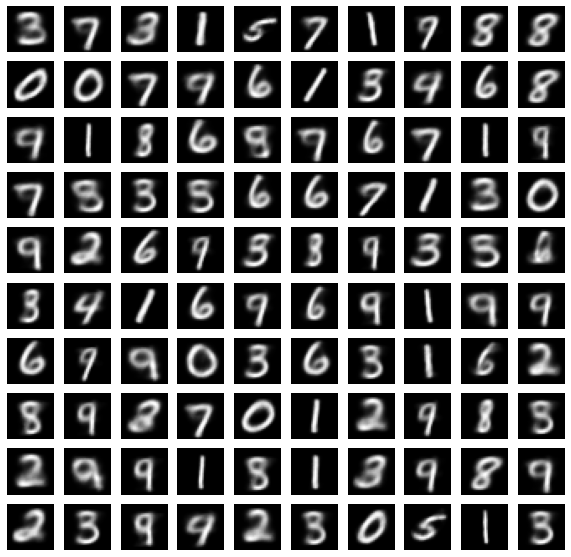

In [9]:
VAE_model = VariationalAutoEncoder(28*28, 28*28, latent_dim=2, n_hidden_layers=1, hidden_dim=512)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
VAE_model.to(device)

VAE_model.load('VAE_model')
VAE_model.eval()

x, _ = next(iter(MNIST_test_data))
x = x.view(-1, 28*28).to(device)
n_samples = 100

x_recon, _, _ = VAE_model(x)
x_recon = x_recon.detach().cpu().view(-1, 28, 28)

plt.figure(figsize=(10,10))
for i in range(n_samples):
    plt.subplot(10,10,i+1)
    plt.imshow(x_recon[i].reshape(28,28), cmap='gray')
    plt.axis('off')
plt.savefig('4-4-4-2.jpg',dpi=1000, bbox_inches='tight')
plt.show()

We can see from above that the trained VAE model is capable of generating high-quality digits that well resemble the original digits from MNIST dataset.

(5) Use your trained inference model to transform images from the test set to the latent space. Visualize the points in the latent space as a scatter plot, where colors of points should correspond to the labels of the digits. Determine the min and max values of $z1, z2$ from the scatter plot and create a $20\times  20$ mesh grid over the corresponding rectangle. Generate and visualize digits from your trained model for each of these grid points, and plot each set on a $20 \times 20$ tile grid.

***Proof.*** We use the trained VAE inference model to transform $1000$ images from the test set to the latent space and visualize the points as a scatter plot below.

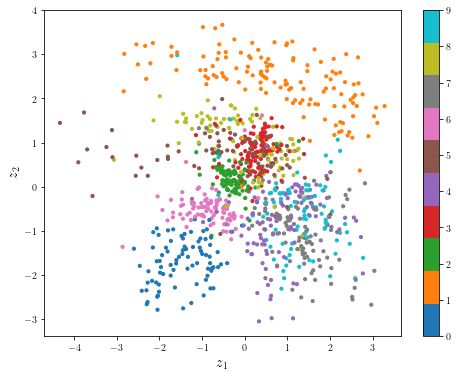

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch import nn
import torchvision

from tqdm import tqdm
%matplotlib inline


def visualize_latent(model, data, device, n_samples=1000):
    """
    visualize latent space
    """
    x, y = next(iter(data))
    x = x.view(-1, 28*28).to(device)

    with torch.no_grad():
        z = model.to_latent(x)

    z = z.cpu().numpy()
    y = y.numpy()

    plt.figure(figsize=(8,6))
    plt.rcParams.update({
        "text.usetex": True
    })
    plt.scatter(z[:n_samples,0], z[:n_samples,1], c=y, cmap='tab10', s=10)
    plt.xlabel('$z_1$', fontsize='x-large')
    plt.ylabel('$z_2$', fontsize='x-large')
    plt.colorbar()
    plt.savefig('4-4-5-1.jpg',dpi=1000, bbox_inches='tight')
    plt.show()


MNIST_test_data = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('MNIST_test_data', train=False, download=True, transform=torchvision.transforms.ToTensor()),
    batch_size=1000, shuffle=True
)

VAE_model = VariationalAutoEncoder(28*28, 28*28, latent_dim=2, n_hidden_layers=1, hidden_dim=512)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
VAE_model.to(device)

VAE_model.load('VAE_model')
VAE_model.eval()

visualize_latent(VAE_model, MNIST_test_data, device, n_samples=1000)

We set $z_{1,{\rm min}}=-3$,  $z_{1,{\rm max}}=3$,  $z_{2,{\rm min}}=-3$,  $z_{2,{\rm max}}=3$ from the scatter plot and visualize the digits generated by the trained VAE model for each of $20\times 20$ mesh grid points below.

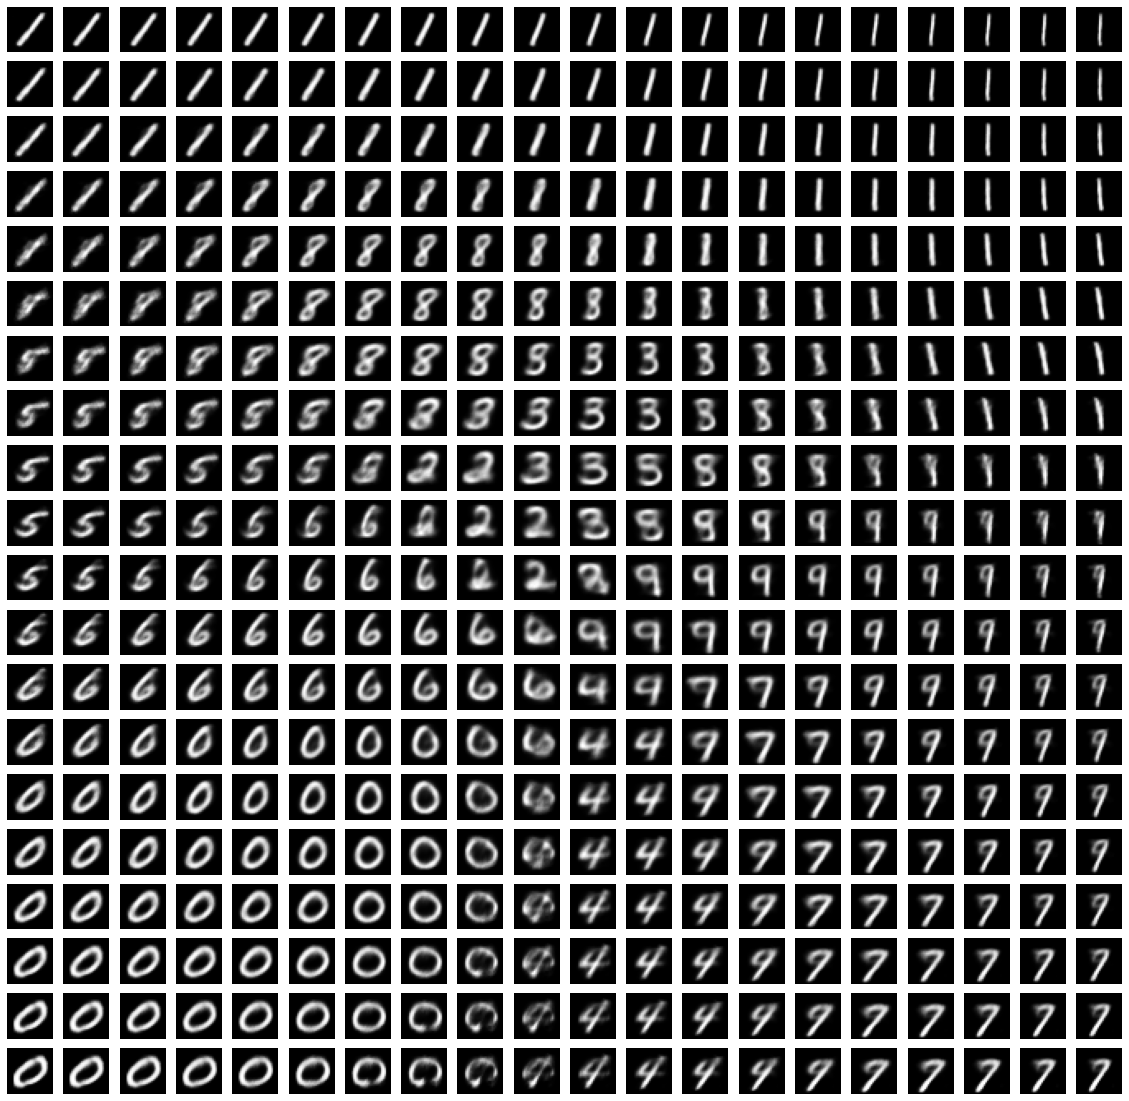

In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch import nn
import torchvision

from tqdm import tqdm
%matplotlib inline


def visualize_generation(model, device, z1_min, z1_max, z2_min, z2_max, n=20):
    """
    Generate and visualize digits from the trained VAE model for each of these grid points
    """
    z1 = np.linspace(z1_min, z1_max, n)
    z2 = np.linspace(z2_max, z2_min, n)
    Z1, Z2 = np.meshgrid(z1, z2)
    Z = np.concatenate((Z1.reshape(-1,1), Z2.reshape(-1,1)), axis=1)
    Z = torch.tensor(Z).float().to(device)

    with torch.no_grad():
        x_recon = model.generate_from_latent(Z)

    x_recon = x_recon.cpu().numpy()

    plt.figure(figsize=(20,20))
    plt.rcParams.update({
        "text.usetex": True
    })
    for i in range(n**2):
        plt.subplot(20,20,i+1)
        plt.imshow(x_recon[i,:].reshape(28,28), cmap='gray')
        plt.axis('off')
    
    plt.savefig('4-4-5-2.jpg',dpi=1000, bbox_inches='tight')
    plt.show()


MNIST_test_data = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('MNIST_test_data', train=False, download=True, transform=torchvision.transforms.ToTensor()),
    batch_size=1000, shuffle=True
)

VAE_model = VariationalAutoEncoder(28*28, 28*28, latent_dim=2, n_hidden_layers=1, hidden_dim=512)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
VAE_model.to(device)

VAE_model.load('VAE_model')
VAE_model.eval()

# generation
visualize_generation(VAE_model, device, z1_min=-3, z1_max=3, z2_min=-3, z2_max=3, n=20)

We can see that the pattern of digits generated by the trained VAE model has a good correspondence with the latent space previously visualized. 